In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

In [2]:
class OneNN:
    
    def __init__(self):
        pass

    def query(self, states):
        actions = []
        for i in range(states.shape[0]):
            actions.append(self.actions[np.argmin(np.abs(np.sum((self.states - states[i,:]) ** 2,axis=1)))])
        return actions
    
    def train(self, inputs, targets):
        self.states = inputs
        self.actions = targets

    def m_step(self, states, actions):

        # States/Actions -> Inputs/Targets
        inputs, targets = extract_trajectory(states, actions)

        # Train kNN
        self.train(inputs, targets.ravel())

In [3]:
# Training Set
sampleCount = 20
states = np.random.randn(sampleCount,2)
actions = 1 * (np.sum(states,axis=1) > 0)

In [4]:
# Training
p = OneNN()
p.train(states, actions)
actions_predicted = p.query(states)

In [5]:
# Testing
M = 100
X = np.random.randn(M,2)
Y = 1 * (np.sum(X,axis=1) > 0)
A = p.query(X)

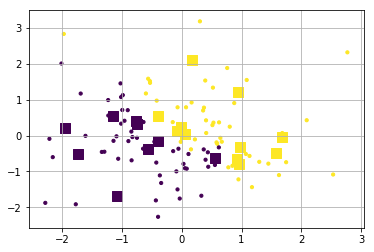

Training Set Perfomance = 1.0
Test Set Perfomance = 0.91


In [6]:
# Plot
plt.scatter(states[:,0], states[:,1], c=actions, s=100, marker='s')
plt.scatter(X[:,0], X[:,1], c=A, s=10, marker='o')
plt.grid()
plt.show()

# Evaluation
print(f'Training Set Perfomance = {sum(1*(actions == actions_predicted)) / sampleCount}')
print(f'Test Set Perfomance = {sum(1*(A == Y)) / M}')